In [15]:
import pandas as pd


path = r"docs/spotData/Spotify_Dataset_V3.csv"

df = pd.read_csv(path,
                 sep=';',            
                 engine='python',    
                 # optional extras:
                 # quoting=3,       # csv.QUOTE_NONE if there are unescaped quotes
                 # on_bad_lines='skip'
                 )

print(df.shape)
df.head()

(651936, 20)


,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,# of Artist,Artist (Ind.),# of Nationality,Nationality,Continent,Points (Total),Points (Ind for each Artist/Nat),id,Song URL
0,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",29/05/2023,0.668,0.758,-5176.0,0.033,0.483,0.000,0.834,Artist 1,Eslabon Armado,Nationality 1,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...
1,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",29/05/2023,0.668,0.758,-5176.0,0.033,0.483,0.000,0.834,Artist 2,Peso Pluma,Nationality 2,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...
2,2,WHERE SHE GOES,Bad Bunny,29/05/2023,0.652,0.800,-4019.0,0.061,0.143,0.629,0.234,Artist 1,Bad Bunny,Nationality 1,Puerto Rico,Latin-America,199,199.0,7ro0hRteUMfnOioTFI5TG1,https://open.spotify.com/track/7ro0hRteUMfnOio...
3,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",29/05/2023,0.812,0.479,-5678.0,0.333,0.213,0.000,0.559,Artist 1,Yng Lvcas,Nationality 1,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...
4,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",29/05/2023,0.812,0.479,-5678.0,0.333,0.213,0.000,0.559,Artist 2,Peso Pluma,Nationality 2,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...


In [16]:
cols = [
    "Title", "Rank", "Artists",
    "Danceability", "Energy",
    "Speechiness", "Acousticness",
    "Instrumentalness", "Valence"
]

spotify = df[cols].copy()
spotify.head()


,Title,Rank,Artists,Danceability,Energy,Speechiness,Acousticness,Instrumentalness,Valence
0,Ella Baila Sola,1,"Eslabon Armado, Peso Pluma",0.668,0.758,0.033,0.483,0.000,0.834
1,Ella Baila Sola,1,"Eslabon Armado, Peso Pluma",0.668,0.758,0.033,0.483,0.000,0.834
2,WHERE SHE GOES,2,Bad Bunny,0.652,0.800,0.061,0.143,0.629,0.234
3,La Bebe - Remix,3,"Yng Lvcas, Peso Pluma",0.812,0.479,0.333,0.213,0.000,0.559
4,La Bebe - Remix,3,"Yng Lvcas, Peso Pluma",0.812,0.479,0.333,0.213,0.000,0.559


In [17]:
#Cleaning and creating the columns I want to anaylize
spotify["multi_artist"] = spotify["Artists"].str.contains(",").astype(int)
spotify["rank_score"] = 201 - spotify["Rank"]
song_level = (
    spotify
    .groupby(["Title", "Artists"], as_index=False)
    .agg({
        "rank_score": "mean",
        "Danceability": "first",
        "Energy": "first",
        "Speechiness": "first",
        "Acousticness": "first",
        "Instrumentalness": "first",
        "Valence": "first",
        "multi_artist": "first"
    })
)

print(song_level.shape)
song_level.head()


(7801, 10)


,Title,Artists,rank_score,Danceability,Energy,Speechiness,Acousticness,Instrumentalness,Valence,multi_artist
0,'98 Braves,Morgan Wallen,71.750000,0.488,0.670,0.027,0.097,0.0,0.484,0
1,!,Trippie Redd,97.000000,0.725,0.543,0.084,0.030,0.0,0.693,0
2,#PROUDCATOWNERREMIX,"XXXTENTACION, Rico Nasty",12.000000,0.783,0.522,0.390,0.029,0.0,0.235,1
3,$$$,XXXTENTACION,84.833333,0.774,0.507,0.065,0.064,0.0,0.508,0
4,$€ Freestyle,Sfera Ebbasta,125.000000,0.813,0.670,0.335,0.200,0.0,0.380,0


In [ ]:
#import sys
#!"{sys.executable}" -m pip install seaborn matplotlib scikit-learn



  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.10.8-cp314-cp314-win_amd64.whl.metadata (52 kB)
  Using cached scikit_learn-1.8.0-cp314-cp314-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.3-cp314-cp314-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.1-cp314-cp314-win_amd64.whl.metadata (116 kB)
  Using cached kiwisolver-1.4.9-cp314-cp314-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-12.1.1-cp314-cp314-win_amd64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.3.2-py3-none-any.whl.metadata (5.8 kB)
  Using cached scipy-1.17.0-cp314-cp314-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.5.3-py3-none-any.whl.metadata (5.5 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached matplotlib-3.10.8-cp314-cp314-win_amd64.whl (8.3 MB)
Using cached scikit_learn-1.8

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

print("All imports successful!")


All imports successful!


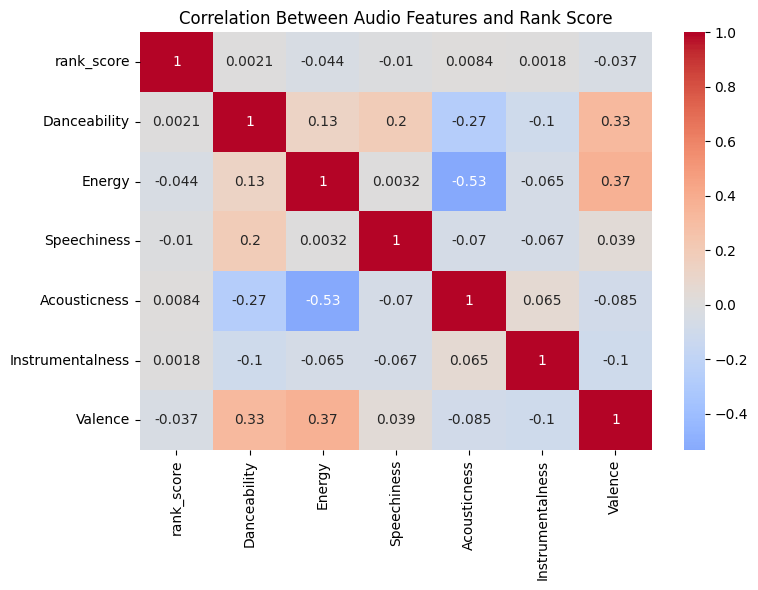

<Figure size 640x480 with 0 Axes>

In [20]:
plt.figure(figsize=(8,6))

corr = song_level[[
    "rank_score", "Danceability", "Energy",
    "Speechiness", "Acousticness",
    "Instrumentalness", "Valence"
]].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)

plt.title("Correlation Between Audio Features and Rank Score")
plt.tight_layout()
plt.show()

plt.savefig("images/correlation_heatmap.png", bbox_inches="tight")


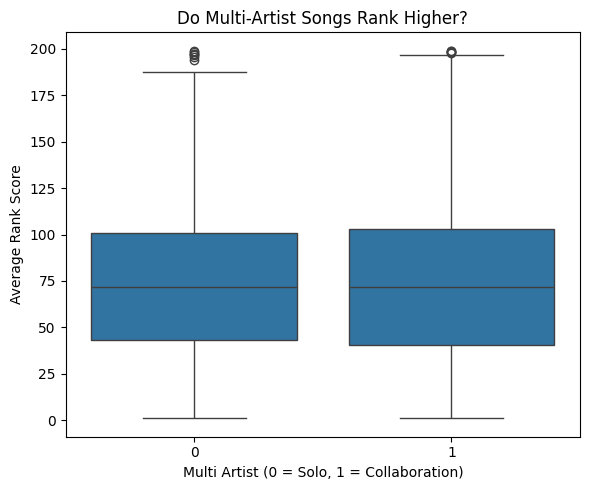

<Figure size 640x480 with 0 Axes>

In [21]:
plt.figure(figsize=(6,5))

sns.boxplot(
    data=song_level,
    x="multi_artist",
    y="rank_score"
)

plt.title("Do Multi-Artist Songs Rank Higher?")
plt.xlabel("Multi Artist (0 = Solo, 1 = Collaboration)")
plt.ylabel("Average Rank Score")

plt.tight_layout()
plt.show()

plt.savefig("images/multi_artist_boxplot.png", bbox_inches="tight")


Danceability         3.431382
multi_artist         1.699243
Instrumentalness    -0.836925
Acousticness        -2.218461
Speechiness         -4.377076
Valence             -4.616276
Energy             -10.228870
dtype: float64


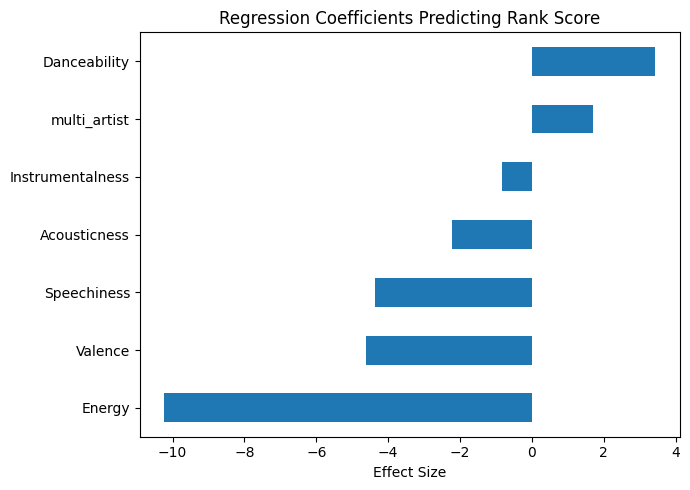

<Figure size 640x480 with 0 Axes>

In [24]:
from sklearn.linear_model import LinearRegression

features = [
    "Danceability", "Energy", "Speechiness",
    "Acousticness", "Instrumentalness",
    "Valence", "multi_artist"
]

X = song_level[features]
y = song_level["rank_score"]

model = LinearRegression()
model.fit(X, y)

coef = pd.Series(model.coef_, index=features)
print(coef.sort_values(ascending=False))

plt.figure(figsize=(7,5))

coef.sort_values().plot(kind="barh")

plt.title("Regression Coefficients Predicting Rank Score")
plt.xlabel("Effect Size")
plt.tight_layout()
plt.show()

plt.savefig("images/regression_coefficients.png", bbox_inches="tight")
